# Text Classification

## Sentment Analysis

In [ ]:
#Trainging a logistic regression model on movie reviews from IMDB. A sentiment analysis score yielded by this model is simply the probability that the input 
#expresses positive sentiment

#obtaining the dataset

import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/jeffprosise/Applied-Machine-Learning/main/Chapter%204/Data/reviews.csv",encoding="ISO-8859-1")
df.head()

,Text,Sentiment
0,Once again Mr. Costner has dragged out a movie...,0
1,This is an example of why the majority of acti...,0
2,"First of all I hate those moronic rappers, who...",0
3,Not even the Beatles could write songs everyon...,0
4,Brass pictures (movies is not a fitting word f...,0


In [ ]:
#Viewing the number of row and checking if there are any missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       50000 non-null  object
 1   Sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


In [ ]:
#Obtaining the number of instances there are for each class 0 for neg and 1 for pos

df.groupby("Sentiment").describe()

Text                                                            \
           count unique                                                top   
Sentiment                                                                    
0          25000  24697  When i got this movie free from my job, along ...   
1          25000  24884  Loved today's show!!! It was a variety and not...   

                
          freq  
Sentiment       
0            3  
1            5

In [ ]:
#the dataset contains duplicate rows which will have to be removed

df = df.drop_duplicates()
df.groupby("Sentiment").describe()

Text                                                            \
           count unique                                                top   
Sentiment                                                                    
0          24697  24697  Once again Mr. Costner has dragged out a movie...   
1          24884  24884  I went and saw this movie last night after bei...   

                
          freq  
Sentiment       
0            1  
1            1

In [ ]:
#Vectorizing the text in the text col

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1,2),stop_words="english",min_df=20)

x = vectorizer.fit_transform(df["Text"])
y = df["Sentiment"]

In [ ]:
# splitting the dataset into training and testing

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.5,random_state=0)

In [ ]:
#training the classifer

from sklearn.linear_model import LogisticRegression


model = LogisticRegression(max_iter=1000,random_state=0)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000, random_state=0)

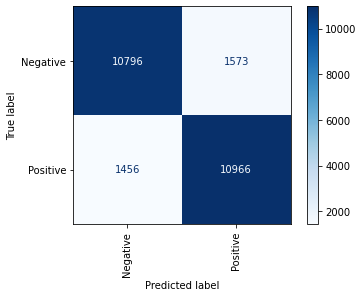

In [ ]:
#Viewing the confusion matrix using the test data

%matplotlib inline

from sklearn.metrics import ConfusionMatrixDisplay as cmd

cmd.from_estimator(model,x_test,y_test,display_labels=["Negative","Positive"],cmap="Blues",xticks_rotation="vertical")

In [ ]:
#Tesing the model with new data neg review

text = "The long lines and poor customer service really turned me off"

model.predict_proba(vectorizer.transform([text]))[0][1]

0.09183134410695232

In [ ]:
#Tesing the model with new data pos review

text = "The food was great and the service was excellent!"
model.predict_proba(vectorizer.transform([text]))[0][1]

0.8536150845893169

## Spam Filtering

In [ ]:
#Building a binary classification model that classifies emails as spam or not spam and uses Naive Bayes to fit the model to the training data

df = pd.read_csv("https://raw.githubusercontent.com/jeffprosise/Applied-Machine-Learning/main/Chapter%204/Data/ham-spam.csv")
df.head()

,IsSpam,Text
0,0,key issues going forwarda year end reviews rep...
1,0,congrats contratulations the execution the cen...
2,0,key issues going forwardall under control set...
3,0,epmi files protest entergy transcoattached our...
4,0,california power please contact kristin walsh ...


In [ ]:
#checking for duplicate rows in the dataset

df.groupby("IsSpam").describe()

Text                                                               
       count unique                                                top freq
IsSpam                                                                     
0        500    499   paso firm capacity award memorandumlouise del...    2
1        500    500  take the reinsbecomeyour employer substantial ...    1

In [ ]:
#Removing the one duplicate row

df = df.drop_duplicates()
df.groupby("IsSpam").describe()

Text                                                               
       count unique                                                top freq
IsSpam                                                                     
0        499    499  key issues going forwarda year end reviews rep...    1
1        500    500  take the reinsbecomeyour employer substantial ...    1

In [ ]:
#using CountVectorizer to vectorize the emails 

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1,2),stop_words="english")
x = vectorizer.fit_transform(df["Text"])
y = df["IsSpam"]

In [ ]:
#Splitting the dataset into training and test sets

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
#Using sklearn naive bayes classifer using MultinomialNB

from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

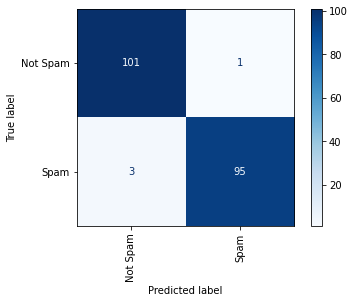

In [ ]:
#Validating the model with the test data using a confusion matrix

cmd.from_estimator(model,x_test,y_test,display_labels=["Not Spam","Spam"],cmap="Blues",xticks_rotation="vertical")

In [ ]:
#using the score method to get a rough measure of the model's accuracy

model.score(x_test,y_test)

0.98

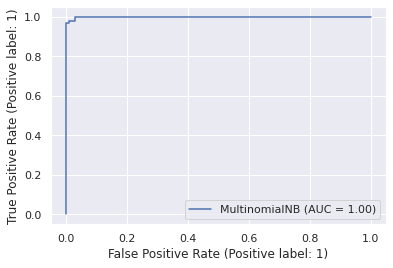

In [ ]:
#Now use Scikit's RocCurveDisplay class to visualize the ROC curve

from sklearn.metrics import RocCurveDisplay as rcd

import seaborn as sns
sns.set()

rcd.from_estimator(model,x_test,y_test)

In [ ]:
#The area under the curve indicates the model is more than 99.9% accurate at classifying emails as spam or not spam

In [ ]:
#Testing the model with emails that it hasn't seen before, starting with one isn't spam.

msg = "Can you attend a code review on Tuesday to make sure the logic is solid?"
input = vectorizer.transform([msg])
model.predict(input)[0]

0

In [ ]:
# model says this message is not spam. Looking at the prob that it's not spam 

model.predict_proba(input)[0][0]

0.9999497111473539

In [ ]:
#testing the model with a message that is spam 

msg = "Why pay more for expensive meds when you order them online and save $$$?"

input = vectorizer.transform([msg])
model.predict(input)[0]

1

In [ ]:
#model says this message is spam. Looking at the prob that the message is not spam 

model.predict_proba(input)[0][0]

0.00021423891260677753

In [ ]:
#Showing the prob that the message is spam
model.predict_proba(input)[0][1]

0.9997857610873945

## Recommender Systems

### Building a Movie Recommendation System using cosine similarity

In [ ]:
#obtaing the movie data
df = pd.read_csv("https://raw.githubusercontent.com/jeffprosise/Applied-Machine-Learning/main/Chapter%204/Data/movies.csv")
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [ ]:
#We only need the following cols title, genres, keywords, cast, director

df = df[["title","genres","keywords","cast","director"]]

In [ ]:
#Filling missing values with empty strings

df = df.fillna("")
df.head()

,title,genres,keywords,cast,director
0,Avatar,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron
1,Pirates of the Caribbean: At World's End,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski
2,Spectre,Action Adventure Crime,spy based on novel secret agent sequel mi6,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes
3,The Dark Knight Rises,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan
4,John Carter,Action Adventure Science Fiction,based on novel mars medallion space travel pri...,Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton


In [ ]:
#Adding a col named features that combines all the words in the other cols

df["features"] = df["title"] + " " + df["genres"] + " " + df["keywords"] + " " + df["cast"] + " " + df["director"]
df.head()

,title,genres,keywords,cast,director,features
0,Avatar,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron,Avatar Action Adventure Fantasy Science Fictio...
1,Pirates of the Caribbean: At World's End,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski,Pirates of the Caribbean: At World's End Adven...
2,Spectre,Action Adventure Crime,spy based on novel secret agent sequel mi6,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes,Spectre Action Adventure Crime spy based on no...
3,The Dark Knight Rises,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan,The Dark Knight Rises Action Crime Drama Thril...
4,John Carter,Action Adventure Science Fiction,based on novel mars medallion space travel pri...,Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton,John Carter Action Adventure Science Fiction b...


In [ ]:
#Using CountVectorizer to vectorize the text in the features column

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words="english",min_df=20)

word_matrix = vectorizer.fit_transform(df["features"])
word_matrix.shape

(4803, 918)

In [ ]:
#computing the cosine similarities for each pair

from sklearn.metrics.pairwise import cosine_similarity

sim = cosine_similarity(word_matrix)

In [ ]:
# Defining a function to get the movie recommendations that takes in a title a dataframe a similarity matrix and the # of movie titles to return

def get_recommendations(title, df,sim,count=10):
  #get the row index of the title in the df

  index = df.index[df["title"].str.lower() == title.lower()]

  #Return an empty list if there is no match

  if len(index) == 0:
    return []

  #Get the corresponding row in the similarity matrix

  similarities = list(enumerate(sim[index[0]]))

  #Sort the similarity scores in the row in descending order

  recommendations = sorted(similarities,key=lambda x: x[1],reverse=True)


  #Get the top n recommendations ignoring the first entry cause its the movie itself

  top_recs = recommendations[1:count+1]

  #Gen a list of titles from the indexes in top recs

  titles = []

  for i in range(len(top_recs)):
    title = df.iloc[top_recs[i][0]]["title"]
    titles.append(title)
  
  return titles



In [ ]:
#using the get recommendation function to search for the 10 movies that are most similar to James Bond Skyfall

get_recommendations("Skyfall",df,sim)

['Spectre',
 'Quantum of Solace',
 'Johnny English Reborn',
 'Clash of the Titans',
 'Die Another Day',
 'Diamonds Are Forever',
 'Wrath of the Titans',
 'I Spy',
 'Sanctum',
 'Blackthorn']

In [ ]:
#Getting similar movies to Mulan

get_recommendations("Mulan",df,sim)

['Shrek',
 'Frozen',
 '1911',
 'Kung Fu Panda',
 'Shrek the Third',
 'The Polar Express',
 'Tangled',
 'Shrek Forever After',
 'Shrek 2',
 'Jungle Shuffle']